In [1]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np
from sympl import get_constant

Rd = get_constant('gas_constant_of_dry_air', 'J kg^-1 K^-1')
Cp =\
    get_constant('heat_capacity_of_dry_air_at_constant_pressure',
                 'J kg^-1 K^-1')
g=get_constant('gravitational_acceleration',
                 'm s^-2') 

DSE2T=4.1249471426737316e-19

/home/data/miniconda3/lib/python3.8/site-packages/sympl/_core/dataarray.py:6: FutureWarning: xarray subclass DataArray should explicitly define __slots__
  class DataArray(xr.DataArray):


In [88]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev2', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

int0=[];dur0=[]
int1=[];dur1=[]
int2=[];dur2=[]
int3=[];dur3=[]
int4=[]
int5=[]
int6=[]
mx=[]

a0=[];a1=[];a2=[];a3=[];a4=[];a5=[]

for i in range(len(Rey[0])):
    
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
    
        R0=Rey[0][i][:,:7].sum(axis=1)
        R1=Rey[1][i][:,:7].sum(axis=1)
        R2=Rey[2][i][:,:7].sum(axis=1)
        R3=Rey[3][i][:,:7].sum(axis=1)

        a0.append(np.mean(R0))
        a1.append(np.mean(R1))
        a2.append(np.mean(R2))
        a3.append(np.mean(R3))
        a4.append(np.mean(convfv[i][:,:7].sum(axis=1)))
        a5.append(np.mean(res[i]))

        st=heat_index[i][-2];end=heat_index[i][-1]

        tot=R0+R1+R2+R3+convfv[i][:,:7].sum(axis=1)+res[i]
        int0.append(np.mean(np.cumsum(np.insert(tot,0,0))))

        t=R0+R1+np.mean(R2)+R3+convfv[i][:,:7].sum(axis=1)+res[i]
        int1.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R0+R2+np.mean(R1)+R3+convfv[i][:,:7].sum(axis=1)+res[i]
        int2.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=np.mean(R0)+R3+R1+R2+convfv[i][:,:7].sum(axis=1)+res[i]
        int3.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R0+R1+R2+np.mean(R3)+convfv[i][:,:7].sum(axis=1)+res[i]
        int4.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R0+R1+R2+R3+np.mean((convfv[i][:,:7]).sum(axis=1))+res[i]
        int5.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R0+R1+R2+R3+convfv[i][:,:7].sum(axis=1)+np.mean(res[i])
        int6.append(np.mean(np.cumsum(np.insert(t,0,0))))
    
print(np.mean(a0),np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4),np.mean(a5))

0.8260446335464808 5.067547951338152
4.258953689367986e+18 -5.889427709519542e+17 -2.444495008313981e+17 -2.576003929105137e+18 -4.1147206105992474e+17 -5.248043905834255e+17


<IPython.core.display.Javascript object>


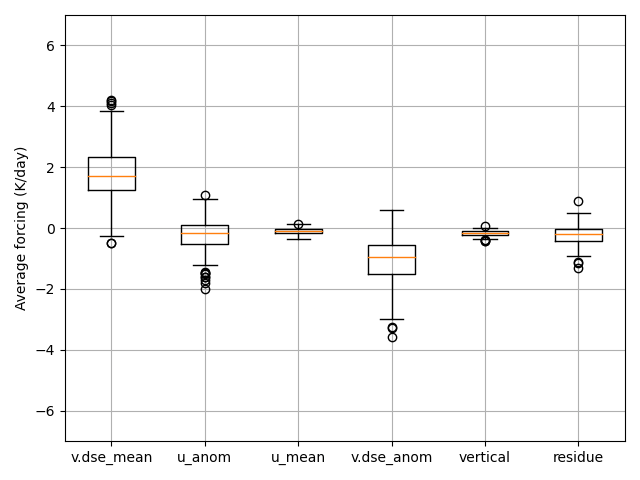

In [89]:
# fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
# fig.set_size_inches(8, 4)

plt.boxplot([np.array(a0)*DSE2T, np.array(a1)*DSE2T, np.array(a2)*DSE2T, np.array(a3)*DSE2T, np.array(a4)*DSE2T,
             np.array(a5)*DSE2T])
# plt.ylim([-5e19,5e19])
# ax[1].boxplot([dur0, dur1, dur2, dur3])
# plt.ylim([-2e19,2e19])
plt.ylim([-7,7])

# print(np.mean(int0))
# print(np.mean(int1))
# print(np.mean(int2))
# print(np.mean(int3))
# print(np.mean(int4))
# print(np.mean(int5))
# print(np.mean(int6))

plt.xticks([1, 2, 3, 4, 5, 6], ['v.dse_mean', 'u_anom', 'u_mean', 'v.dse_anom', 'vertical', 'residue'])
plt.grid()
plt.ylabel('Average forcing (K/day)')
plt.tight_layout()
plt.savefig('/home/data/lab_abel/Paper1_var1/fig10_mean90_equatorward.png', bbox_inches='tight',dpi=300)

<IPython.core.display.Javascript object>


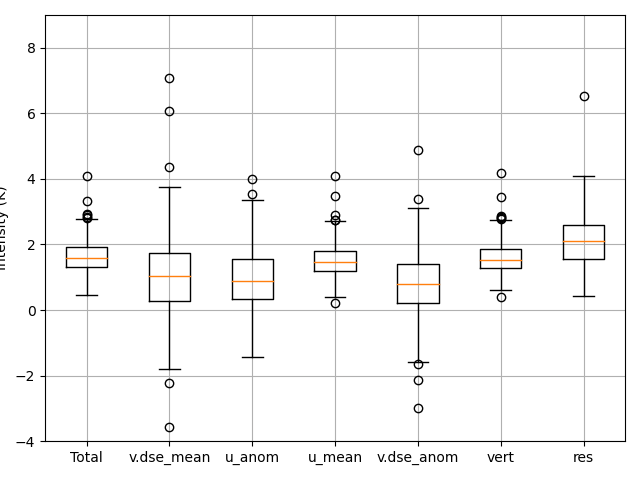

1.6289177648508433
3.679227455999258e+18
2.325019250765334e+18
2.522598842739283e+18
1.9014782405040684e+18
3.9062501737971804e+18
5.1496721394844e+18


In [90]:
# fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
# fig.set_size_inches(8, 4)

plt.boxplot([np.array(int0)*DSE2T, np.array(int3)*DSE2T, np.array(int2)*DSE2T, np.array(int1)*DSE2T, np.array(int4)*DSE2T,
             np.array(int5)*DSE2T, np.array(int6)*DSE2T])
# plt.ylim([-5e19,5e19])
# ax[1].boxplot([dur0, dur1, dur2, dur3])
# ax[1].set_ylim([-1e18,8e19])
plt.ylim([-4,9])

print(np.mean(int0)*4.1249471426737316e-19)
print(np.mean(int1))
print(np.mean(int2))
print(np.mean(int3))
print(np.mean(int4))
print(np.mean(int5))
print(np.mean(int6))

plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Total', 'v.dse_mean', 'u_anom', 'u_mean',  'v.dse_anom', 'vert', 'res'])
plt.grid()
plt.tight_layout()
plt.ylabel('Intensity (K)')

plt.savefig('/home/data/lab_abel/Paper1_var1/fig10_int90_equatorward.png', bbox_inches='tight',dpi=300)

<IPython.core.display.Javascript object>


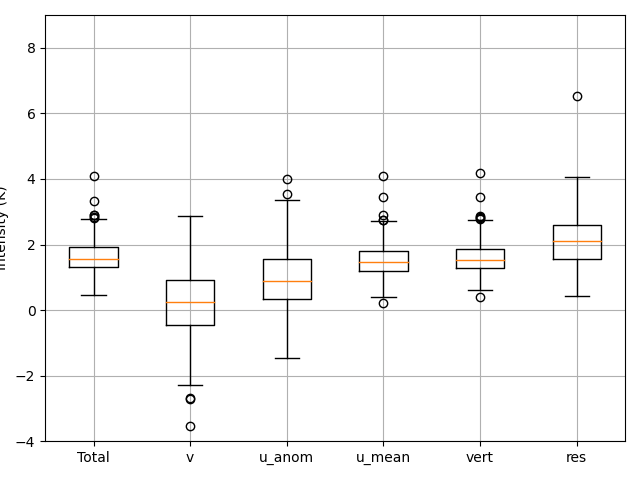

1.6289177648508433
3.679227455999258e+18
2.325019250765334e+18
4.751349307506961e+17
1.9014782405040684e+18
3.9062501737971804e+18
5.1496721394844e+18


In [87]:
# fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
# fig.set_size_inches(8, 4)

plt.boxplot([np.array(int0)*DSE2T, np.array(int3)*DSE2T, np.array(int2)*DSE2T, np.array(int1)*DSE2T,
             np.array(int5)*DSE2T, np.array(int6)*DSE2T])
# plt.ylim([-5e19,5e19])
# ax[1].boxplot([dur0, dur1, dur2, dur3])
# ax[1].set_ylim([-1e18,8e19])
plt.ylim([-4,9])

print(np.mean(int0)*4.1249471426737316e-19)
print(np.mean(int1))
print(np.mean(int2))
print(np.mean(int3))
print(np.mean(int4))
print(np.mean(int5))
print(np.mean(int6))

plt.xticks([1, 2, 3, 4, 5, 6], ['Total', 'v', 'u_anom', 'u_mean', 'vert', 'res'])
plt.grid()
plt.tight_layout()
plt.ylabel('Intensity (K)')

plt.savefig('/home/data/lab_abel/Paper1_var1/fig10_int90_equatorward2.png', bbox_inches='tight',dpi=300)

In [3]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev2', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

heat0=np.zeros(20)
heat1=np.zeros(20)
heat2=np.zeros(20)

heat20=np.zeros(20)
heat21=np.zeros(20)
heat22=np.zeros(20)

act=np.zeros(20)
act2=np.zeros(20)

res_arr=np.zeros(20)
res_arr2=np.zeros(20)

c=0
for i in range(len(Rey[0])):
    
#     if (dur_list[i]>=3  and dur_list[i]<=5):
        
        c=c+1
    
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat0[j]+=t[j]
            heat20[j]+=t[j]*t[j]

        t=Rey[1][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat1[j]+=t[j]
            heat21[j]+=t[j]*t[j]

        t=Rey[2][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat2[j]+=t[j]
            heat22[j]+=t[j]*t[j]
            
        t=res[i]

        for j in range(len(t)):
            res_arr[j]+=t[j]
            res_arr2[j]+=t[j]*t[j]
            
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)+res[i]

        for j in range(len(t)):
            act[j]+=t[j]
            act2[j]+=t[j]*t[j]

print(c)

0.8260446335464808 5.067547951338152
1975


<IPython.core.display.Javascript object>


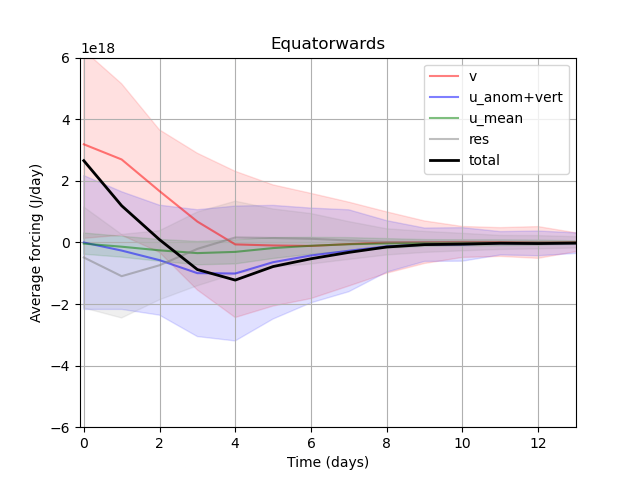

7.840283198476107e+20 -4.5268547090633405e+20 -1.5334254189786405e+20
-2.1132094910033002e+17


In [4]:
plt.plot(heat0/c, label='v', color='red', alpha=0.5)
std=np.sqrt((heat20-(heat0*heat0)/c)/(c-1))
plt.fill_between(range(len(heat0)), heat0/c-std,heat0/c+std, alpha=0.12,color='red')

plt.plot(heat1/c, label='u_anom+vert', color='blue', alpha=0.5)
std=np.sqrt((heat21-(heat1*heat1)/c)/(c-1))
plt.fill_between(range(len(heat1)), heat1/c-std,heat1/c+std, alpha=0.12,color='blue')

plt.plot(heat2/c, label='u_mean', color='green', alpha=0.5)
std=np.sqrt((heat22-(heat2*heat2)/c)/(c-1))
plt.fill_between(range(len(heat2)), heat2/c-std,heat2/c+std, alpha=0.12,color='green')

plt.plot(res_arr/c, label='res', color='grey', alpha=0.5)
std=np.sqrt((res_arr2-(res_arr*res_arr)/c)/(c-1))
plt.fill_between(range(len(res_arr)), res_arr/c-std,res_arr/c+std, alpha=0.12,color='grey')

plt.plot((heat0+heat1+heat2+res_arr)/c, linewidth=2, color='black', label='total')
# plt.plot((act)/c, linewidth=2, color='black', label='total')

print(np.mean(heat0), np.mean(heat1), np.mean(heat2))
th=(heat0+heat1+heat2+res_arr)/c
print(np.sum(th))

plt.xlim([-0.1,13])
plt.legend()
plt.ylim(-6e18, 6e18)
plt.title('Equatorwards')
plt.ylabel('Average forcing (J/day)')
plt.xlabel('Time (days)')
plt.grid()
plt.savefig('/home/data/lab_abel/Paper1_var1/fig10_dur_equatorward.png', bbox_inches='tight',dpi=300)

In [14]:
print(np.max(np.cumsum(th)))
print(th[:3].sum())

print(th[:3].sum()/(th[3:7].mean()))

print(np.cumsum(th[3:]/th[3:].sum()))

3.9339592267619476e+18
3.9339592267619476e+18
-4.6017175103541295
[0.21249905 0.50775844 0.69684801 0.82492792 0.90323723 0.93936555
 0.95673226 0.97015968 0.97709125 0.98599529 0.99152977 0.99410091
 0.99562012 0.99722353 0.99852439 0.99926809 1.        ]


In [11]:
std=np.sqrt((act2-(act*act)/c)/(c-1))
mean=act/c

# print(th[:3].sum()/(th[3:6].mean()))

print(mean[3:]/mean[3:].sum())
print(-std[3:]/mean[3:].sum())

[0.21249905 0.29525939 0.18908957 0.1280799  0.07830932 0.03612832
 0.01736671 0.01342742 0.00693158 0.00890403 0.00553448 0.00257114
 0.00151921 0.00160341 0.00130086 0.0007437  0.00073191]
[0.44596892 0.51666454 0.4416671  0.38113002 0.32247627 0.21670234
 0.14558641 0.13481651 0.08955906 0.1032254  0.09564883 0.07426461
 0.03400714 0.04269212 0.04063684 0.02586665 0.02113422]


<IPython.core.display.Javascript object>


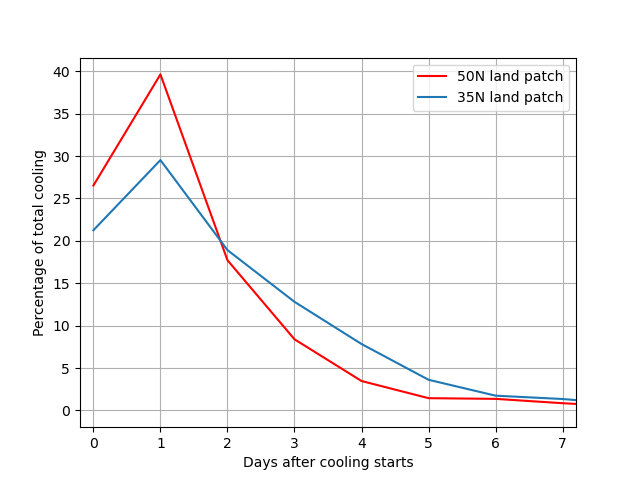

In [16]:
%matplotlib notebook
xp=[ 0.26527938,  0.39632471,  0.17717311,  0.08388002,  0.03466635,  0.01441519,
  0.01360081,  0.00847655,  0.00423892,  0.00097655,  0.0009684,  -0.        ]

xe=[0.21249905, 0.29525939, 0.18908957, 0.1280799,  0.07830932, 0.03612832,
 0.01736671, 0.01342742, 0.00693158, 0.00890403, 0.00553448, 0.00257114,
 0.00151921, 0.00160341, 0.00130086, 0.0007437,  0.00073191]

plt.plot(np.array(xp)*100, label='50N land patch', color='red')
plt.plot(np.array(xe)*100, label='35N land patch')
plt.xlim([-0.2,7.2])
plt.xlabel('Days after cooling starts')
plt.ylabel('Percentage of total cooling')
plt.legend()
plt.grid()

plt.savefig('/home/data/lab_abel/Paper1_var1/fig10_cooling.png', bbox_inches='tight',dpi=300)

In [2]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev2', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

heat0=np.zeros(20)
heat1=np.zeros(20)
heat2=np.zeros(20)
res_arr=np.zeros(20)
res_arr2=np.zeros(20)
act=np.zeros(20)
act2=np.zeros(20)

heat20=np.zeros(20)
heat21=np.zeros(20)
heat22=np.zeros(20)

c0=np.zeros(20)
c1=np.zeros(20)
c2=np.zeros(20)
c3=np.zeros(20)
c4=np.zeros(20)

for i in range(len(Rey[0])):
    
#     if (dur_list[i]>=3  and dur_list[i]<=5):
    
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat0[j]+=t[j]
            heat20[j]+=t[j]*t[j]
            c0[j]+=1

        t=Rey[1][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat1[j]+=t[j]
            heat21[j]+=t[j]*t[j]
            c1[j]+=1

        t=Rey[2][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat2[j]+=t[j]
            heat22[j]+=t[j]*t[j]
            c2[j]+=1
            
        t=res[i]

        for j in range(len(t)):
            res_arr[j]+=t[j]
            res_arr2[j]+=t[j]*t[j]
            c3[j]+=1
            
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)+res[i]

        for j in range(len(t)):
            act[j]+=t[j]
            act2[j]+=t[j]*t[j]
            c4[j]+=1


# print(c)

0.8260446335464808 5.067547951338152


<IPython.core.display.Javascript object>


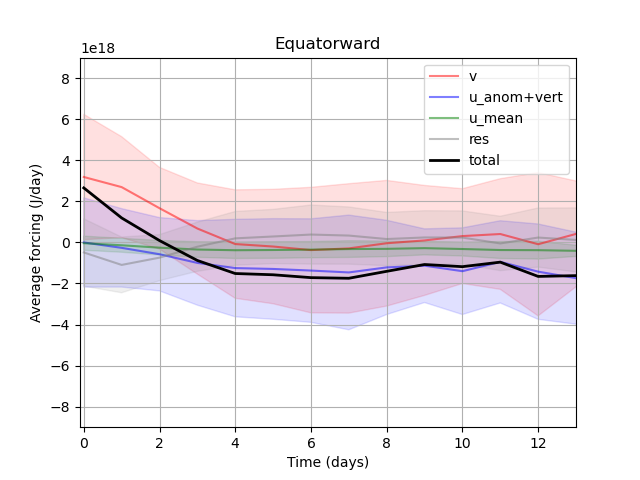

In [3]:
plt.plot(heat0/c0, label='v', color='red', alpha=0.5)
std=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
plt.fill_between(range(len(heat0)), heat0/c0-std,heat0/c0+std, alpha=0.12,color='red')

plt.plot(heat1/c1, label='u_anom+vert', color='blue', alpha=0.5)
std=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
plt.fill_between(range(len(heat1)), heat1/c1-std,heat1/c1+std, alpha=0.12,color='blue')

plt.plot(heat2/c2, label='u_mean', color='green', alpha=0.5)
std=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
plt.fill_between(range(len(heat2)), heat2/c2-std,heat2/c2+std, alpha=0.12,color='green')

plt.plot(res_arr/c3, label='res', color='grey', alpha=0.5)
std=np.sqrt((res_arr2-(res_arr*res_arr)/c3)/(c3-1))
plt.fill_between(range(len(res_arr)), res_arr/c3-std,res_arr/c3+std, alpha=0.12,color='grey')

plt.plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3, linewidth=2, color='black', label='total')
# plt.plot((act)/c, linewidth=2, color='black', label='total')

# plt.plot(act/c4, label='res', color='grey', alpha=0.5)
# std=np.sqrt((act2-(act*act)/c)/(c-1))
# plt.fill_between(range(len(act)), act/c-std,act/c+std, alpha=0.12,color='grey')

# print(np.mean(heat0), np.mean(heat1), np.mean(heat2))
# th=(heat0+heat1+heat2+res_arr)/c
# print(np.sum(th))

plt.xlim([-0.1,13])
plt.legend()
plt.ylim(-9e18, 9e18)
plt.title('Equatorward')
plt.ylabel('Average forcing (J/day)')
plt.xlabel('Time (days)')
plt.grid()
plt.savefig('/home/data/lab_abel/Paper1_var1/fig10_dur_equatorward2.png', bbox_inches='tight',dpi=300)

In [4]:
x=heat0/c0+heat1/c1+heat2/c2+res_arr/c3
print(len(x[:3])-x[:3].sum()/x[3:].mean())
print(c0)

5.761287798673726
[1975. 1975. 1975. 1975. 1595.  982.  611.  367.  210.  132.   93.   59.
   44.   28.   18.   13.    9.    6.    4.    3.]


## threshold specific

In [2]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev2', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
print(cut)

heat0=np.zeros(20)
heat1=np.zeros(20)
heat2=np.zeros(20)
res_arr=np.zeros(20)
res_arr2=np.zeros(20)
vert_arr=np.zeros(20)
vert_arr2=np.zeros(20)
act=np.zeros(20)
act2=np.zeros(20)

heat20=np.zeros(20)
heat21=np.zeros(20)
heat22=np.zeros(20)

c0=np.zeros(20)
c1=np.zeros(20)
c2=np.zeros(20)
c3=np.zeros(20)
c4=np.zeros(20)
dur_sel=[]

for i in range(len(Rey[0])):
    
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        
        dur_sel.append(dur_list[i])
    
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat0[j]+=t[j]
            heat20[j]+=t[j]*t[j]
            c0[j]+=1

        t=Rey[1][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat1[j]+=t[j]
            heat21[j]+=t[j]*t[j]
            c1[j]+=1

        t=Rey[2][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat2[j]+=t[j]
            heat22[j]+=t[j]*t[j]
            c2[j]+=1
            
        t=res[i]

        for j in range(len(t)):
            res_arr[j]+=t[j]
            res_arr2[j]+=t[j]*t[j]
            c3[j]+=1
            
        t=convfv[i][:,:7].sum(axis=1)

        for j in range(len(t)):
            vert_arr[j]+=t[j]
            vert_arr2[j]+=t[j]*t[j]
#             cv[j]+=1
            
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)+res[i]

        for j in range(len(t)):
            act[j]+=t[j]
            act2[j]+=t[j]*t[j]
            c4[j]+=1

print(np.mean(dur_sel))
# print(c)

0.8260446335464808 5.067547951338152
[ 3.00055761  3.2139928   4.2378211   4.65521019  7.63112257 19.55768076]
10.028988368028708


<IPython.core.display.Javascript object>


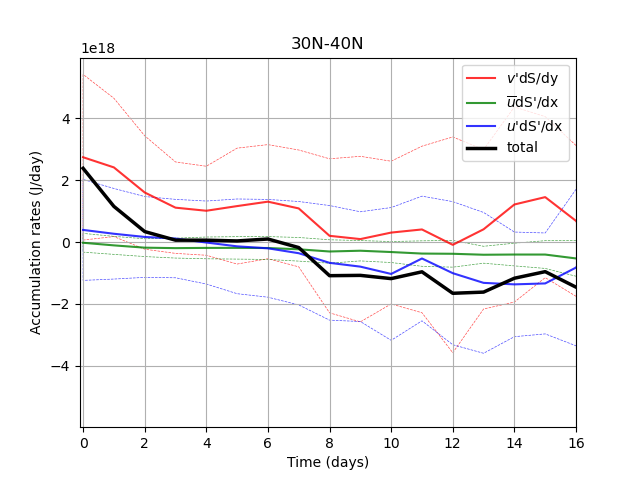

In [3]:
plt.plot(heat0/c0, label= r'$v$'+'\''+'dS/dy', color='red', alpha=0.8)
std1=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
plt.fill_between(range(len(heat0)), heat0/c0-std1,heat0/c0+std1, alpha=0.7,edgecolor='red', facecolor='none', linewidth=0.5, linestyle='--')

plt.plot(heat2/c2, label= r'$\overline{u}$'+'dS\'/dx', color='green', alpha=0.8)
std2=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
plt.fill_between(range(len(heat2)), heat2/c2-std2,heat2/c2+std2, alpha=0.7,edgecolor='green', facecolor='none', linewidth=0.5, linestyle='--')

plt.plot(heat1/c1, label= r'$u$'+'\''+'dS\'/dx', color='blue', alpha=0.8)
std3=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
plt.fill_between(range(len(heat1)), heat1/c1-std3,heat1/c1+std3, alpha=0.7,edgecolor='blue', facecolor='none', linewidth=0.5, linestyle='--')

# plt.plot(vert_arr/c3, label='vert', color='purple', alpha=0.5)
# std=np.sqrt((vert_arr2-(vert_arr*vert_arr)/c3)/(c3-1))
# plt.fill_between(range(len(vert_arr)), vert_arr/c3-std,vert_arr/c3+std, alpha=0.12,color='purple')

# plt.plot(res_arr/c3, label='res', color='grey', alpha=0.5)
# std=np.sqrt((res_arr2-(res_arr*res_arr)/c3)/(c3-1))
# plt.fill_between(range(len(res_arr)), res_arr/c3-std,res_arr/c3+std, alpha=0.12,color='grey')

plt.plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black', label='total')
# plt.plot((act)/c, linewidth=2, color='black', label='total')

# plt.plot(act/c4, label='res', color='grey', alpha=0.5)
# std=np.sqrt((act2-(act*act)/c)/(c-1))
# plt.fill_between(range(len(act)), act/c-std,act/c+std, alpha=0.12,color='grey')

# print(np.mean(heat0), np.mean(heat1), np.mean(heat2))
# th=(heat0+heat1+heat2+res_arr)/c
# print(np.sum(th))

plt.xlim([-0.1,16])
plt.legend()
# plt.ylim(-9e18, 9e18)
plt.title('30N-40N')
plt.ylabel('Accumulation rates (J/day)')
plt.xlabel('Time (days)')
plt.grid()
plt.savefig('/home/data/lab_abel/Paper1_plots/fig10_dur_equatorward90.pdf', bbox_inches='tight')

In [5]:
x=(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3)[:-1]
print(x)
print(x[:7])
print(len(x[:7])+-x[:7].sum()/x[7:].mean())
print(-x[:7].sum(),np.cumsum(x[7:]))
print(c0)

[ 2.38553314e+18  1.15389533e+18  3.39387150e+17  6.19044167e+16
  6.07056083e+16  3.66750377e+16  9.89065595e+16 -1.77581702e+17
 -1.08709877e+18 -1.07712103e+18 -1.18203567e+18 -9.61835829e+17
 -1.65674270e+18 -1.61822809e+18 -1.16943072e+18 -9.56744224e+17
 -1.45855985e+18 -1.77500298e+18 -1.52214548e+18]
[2.38553314e+18 1.15389533e+18 3.39387150e+17 6.19044167e+16
 6.07056083e+16 3.66750377e+16 9.89065595e+16]
10.39040431433374
-4.137007240770979e+18 [-1.77581702e+17 -1.26468047e+18 -2.34180150e+18 -3.52383718e+18
 -4.48567300e+18 -6.14241571e+18 -7.76064380e+18 -8.93007452e+18
 -9.88681874e+18 -1.13453786e+19 -1.31203816e+19 -1.46425271e+19]
[198. 198. 198. 198. 198. 198. 198. 198. 191. 132.  93.  59.  44.  28.
  18.  13.   9.   6.   4.   3.]


In [4]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev2', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
print(cut)

heat0=np.zeros(20)
heat1=np.zeros(20)
heat2=np.zeros(20)
res_arr=np.zeros(20)
res_arr2=np.zeros(20)
act=np.zeros(20)
act2=np.zeros(20)
vert_arr=np.zeros(20)
vert_arr2=np.zeros(20)

heat20=np.zeros(20)
heat21=np.zeros(20)
heat22=np.zeros(20)

c0=np.zeros(20)
c1=np.zeros(20)
c2=np.zeros(20)
c3=np.zeros(20)
c4=np.zeros(20)
dur_sel=[]

for i in range(len(Rey[0])):
    
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):
        
        dur_sel.append(dur_list[i])
    
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat0[j]+=t[j]
            heat20[j]+=t[j]*t[j]
            c0[j]+=1

        t=Rey[1][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat1[j]+=t[j]
            heat21[j]+=t[j]*t[j]
            c1[j]+=1

        t=Rey[2][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat2[j]+=t[j]
            heat22[j]+=t[j]*t[j]
            c2[j]+=1
            
        t=res[i]

        for j in range(len(t)):
            res_arr[j]+=t[j]
            res_arr2[j]+=t[j]*t[j]
            c3[j]+=1
            
        t=convfv[i][:,:7].sum(axis=1)

        for j in range(len(t)):
            vert_arr[j]+=t[j]
            vert_arr2[j]+=t[j]*t[j]
#             cv[j]+=1
            
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)+res[i]

        for j in range(len(t)):
            act[j]+=t[j]
            act2[j]+=t[j]*t[j]
            c4[j]+=1

print(np.mean(dur_sel))
# print(c)

0.8260446335464808 5.067547951338152
[ 3.00055761  3.2139928   4.2378211   4.65521019  7.63112257 19.55768076]
3.0956294552081283


/tmp/ipykernel_3402316/67381099.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat0/c0, label= r'$v$'+'\''+'dS/dy', color='red', alpha=0.8)


<IPython.core.display.Javascript object>


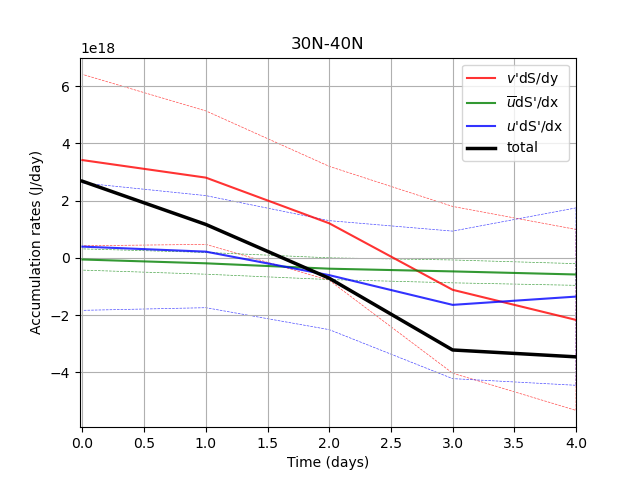

/tmp/ipykernel_3402316/67381099.py:2: RuntimeWarning: invalid value encountered in true_divide
  std1=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
/tmp/ipykernel_3402316/67381099.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.fill_between(range(len(heat0)), heat0/c0-std1,heat0/c0+std1, alpha=0.7,edgecolor='red', facecolor='none', linewidth=0.5, linestyle='--')
/tmp/ipykernel_3402316/67381099.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat2/c2, label= r'$\overline{u}$'+'dS\'/dx', color='green', alpha=0.8)
/tmp/ipykernel_3402316/67381099.py:6: RuntimeWarning: invalid value encountered in true_divide
  std2=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
/tmp/ipykernel_3402316/67381099.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.fill_between(range(len(heat2)), heat2/c2-std2,heat2/c2+std2, alpha=0.7,edgecolor='green', facecolor='none', linewidth=0.5, linestyle='--')
/tmp/ipykernel_3402316/67381099.py:9: RuntimeWarning: in

In [5]:
plt.plot(heat0/c0, label= r'$v$'+'\''+'dS/dy', color='red', alpha=0.8)
std1=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
plt.fill_between(range(len(heat0)), heat0/c0-std1,heat0/c0+std1, alpha=0.7,edgecolor='red', facecolor='none', linewidth=0.5, linestyle='--')

plt.plot(heat2/c2, label= r'$\overline{u}$'+'dS\'/dx', color='green', alpha=0.8)
std2=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
plt.fill_between(range(len(heat2)), heat2/c2-std2,heat2/c2+std2, alpha=0.7,edgecolor='green', facecolor='none', linewidth=0.5, linestyle='--')

plt.plot(heat1/c1, label= r'$u$'+'\''+'dS\'/dx', color='blue', alpha=0.8)
std3=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
plt.fill_between(range(len(heat1)), heat1/c1-std3,heat1/c1+std3, alpha=0.7,edgecolor='blue', facecolor='none', linewidth=0.5, linestyle='--')

# plt.plot(vert_arr/c3, label='vert', color='purple', alpha=0.5)
# std=np.sqrt((vert_arr2-(vert_arr*vert_arr)/c3)/(c3-1))
# plt.fill_between(range(len(vert_arr)), vert_arr/c3-std,vert_arr/c3+std, alpha=0.12,color='purple')

# plt.plot(res_arr/c3, label='res', color='grey', alpha=0.5)
# std=np.sqrt((res_arr2-(res_arr*res_arr)/c3)/(c3-1))
# plt.fill_between(range(len(res_arr)), res_arr/c3-std,res_arr/c3+std, alpha=0.12,color='grey')

plt.plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black', label='total')
# plt.plot((act)/c, linewidth=2, color='black', label='total')

# plt.plot(act/c4, label='res', color='grey', alpha=0.5)
# std=np.sqrt((act2-(act*act)/c)/(c-1))
# plt.fill_between(range(len(act)), act/c-std,act/c+std, alpha=0.12,color='grey')

# print(np.mean(heat0), np.mean(heat1), np.mean(heat2))
# th=(heat0+heat1+heat2+res_arr)/c
# print(np.sum(th))

plt.xlim([-0.02,4])
plt.legend()
# plt.ylim(-9e18, 9e18)
plt.title('30N-40N')
plt.ylabel('Accumulation rates (J/day)')
plt.xlabel('Time (days)')
plt.grid()
plt.savefig('/home/data/lab_abel/Paper1_plots/fig10_dur_equatorward10.pdf', bbox_inches='tight')

In [8]:
x=(heat0/c0+heat1/c1+heat2/c2+res_arr/c3++vert_arr/c3)[:-15]
print(x[:2])
print(len(x[:2])+-x[:2].sum()/x[2:].mean())
print(-x[:2].sum(),np.cumsum(x[2:]))
# print(c0)

[2.67828055e+18 1.16762205e+18]
3.56082382733858
-3.845902600726651e+18 [-7.12253496e+17 -3.93204071e+18 -7.39206283e+18]


/tmp/ipykernel_2109216/1243827482.py:1: RuntimeWarning: invalid value encountered in true_divide
  x=(heat0/c0+heat1/c1+heat2/c2+res_arr/c3++vert_arr/c3)[:-15]


In [6]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev2', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

int0=[];dur0=[]
int1=[];dur1=[]
int2=[];dur2=[]
int3=[];dur3=[]
int4=[]
int5=[]
int6=[]
mx=[]

a0=[];a1=[];a2=[];a3=[];a4=[];a5=[]

mx=[]
for i in range(len(Rey[0])):
    
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
    
        R0=Rey[0][i][:,:7].sum(axis=1)
        R1=Rey[1][i][:,:7].sum(axis=1)
        R2=Rey[2][i][:,:7].sum(axis=1)
        R3=Rey[3][i][:,:7].sum(axis=1)

        a0.append(np.mean(R0))
        a1.append(np.mean(R1))
        a2.append(np.mean(R2))
        a3.append(np.mean(R3))
        a4.append(np.mean(convfv[i][:,:7].sum(axis=1)))
        a5.append(np.mean(res[i]))

        st=heat_index[i][-2];end=heat_index[i][-1]

        tot=R0+R1+R2+R3+convfv[i][:,:7].sum(axis=1)+res[i]
        int0.append(np.mean(np.cumsum(np.insert(tot,0,0))))

        t=R0+R3
        int1.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R1
        int2.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R2
        int3.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R3
        int4.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=convfv[i][:,:7].sum(axis=1)
        int5.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=res[i]
        int6.append(np.mean(np.cumsum(np.insert(t,0,0))))

print(np.mean(a0),np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4),np.mean(a5))

0.8260446335464808 5.067547951338152
4.258953689367986e+18 -5.889427709519542e+17 -2.444495008313981e+17 -2.576003929105137e+18 -4.1147206105992474e+17 -5.248043905834255e+17


<IPython.core.display.Javascript object>


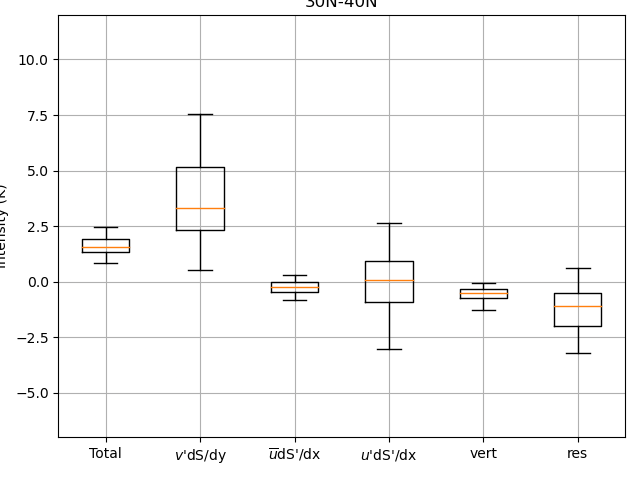

1.6289177648508433
8.971006359264813e+18
-1.0635421662615418e+17
-5.807515034505951e+17
-1.3508926090686392e+18
-2.98406587762677e+18


In [7]:
# plt.rcParams['text.usetex'] = True
# fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
# fig.set_size_inches(8, 4)

plt.boxplot([np.array(int0)*DSE2T, np.array(int1)*DSE2T, np.array(int3)*DSE2T, np.array(int2)*DSE2T,
             np.array(int5)*DSE2T, np.array(int6)*DSE2T], showfliers=False, whis=(5,95))
# plt.ylim([-5e19,5e19])
# ax[1].boxplot([dur0, dur1, dur2, dur3])
# ax[1].set_ylim([-1e18,8e19])
plt.ylim([-7,12])

print(np.mean(int0)*4.1249471426737316e-19)
print(np.mean(int1))
print(np.mean(int2))
print(np.mean(int3))
# print(np.mean(int4))
print(np.mean(int5))
print(np.mean(int6))

plt.xticks([1, 2, 3, 4, 5, 6], ['Total', r'$v$'+'\''+'dS/dy', 
                                r'$\overline{u}$'+'dS\'/dx', r'$u$'+'\''+'dS\'/dx',  'vert', 'res'])
plt.grid()
plt.tight_layout()
plt.ylabel('Intensity (K)')
plt.title('30N-40N')

plt.savefig('/home/data/lab_abel/Paper1_plots/fig10_int90_equatorward2.pdf', bbox_inches='tight')

In [8]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev2', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

int0=[];dur0=[]
int1=[];dur1=[]
int2=[];dur2=[]
int3=[];dur3=[]
int4=[]
int5=[]
int6=[]
mx=[]

a0=[];a1=[];a2=[];a3=[];a4=[];a5=[]

mx=[]
for i in range(len(Rey[0])):
    
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
    
        R0=Rey[0][i][:,:7].sum(axis=1)
        R1=Rey[1][i][:,:7].sum(axis=1)
        R2=Rey[2][i][:,:7].sum(axis=1)
        R3=Rey[3][i][:,:7].sum(axis=1)

        a0.append(np.mean(R0))
        a1.append(np.mean(R1))
        a2.append(np.mean(R2))
        a3.append(np.mean(R3))
        a4.append(np.mean(convfv[i][:,:7].sum(axis=1)))
        a5.append(np.mean(res[i]))

        st=heat_index[i][-2];end=heat_index[i][-1]

        tot=R0+R1+R2+R3+convfv[i][:,:7].sum(axis=1)+res[i]
        int0.append(np.mean(np.cumsum(np.insert(tot,0,0))))

        t=R0+R3
        int1.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R1
        int2.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R2
        int3.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R3
        int4.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=convfv[i][:,:7].sum(axis=1)
        int5.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=res[i]
        int6.append(np.mean(np.cumsum(np.insert(t,0,0))))

print(np.mean(a0),np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4),np.mean(a5))

0.8260446335464808 5.067547951338152
4.0382736191427185e+18 -1.7647230481140794e+17 -2.5376236664619853e+17 -3.068505222481572e+18 -3.6305759778968845e+17 -1.7690796337785894e+17


<IPython.core.display.Javascript object>


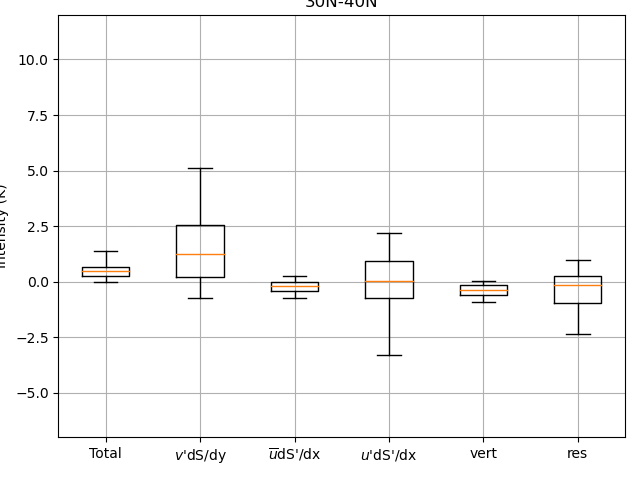

0.5162843734956007
3.7122740375369175e+18
-9.970946231667627e+16
-5.395909008955661e+17
-9.416049269200996e+17
-8.797542281432394e+17


In [9]:
# fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
# fig.set_size_inches(8, 4)

plt.boxplot([np.array(int0)*DSE2T, np.array(int1)*DSE2T, np.array(int3)*DSE2T, np.array(int2)*DSE2T,
             np.array(int5)*DSE2T, np.array(int6)*DSE2T], showfliers=False, whis=(5,95))
# plt.ylim([-5e19,5e19])
# ax[1].boxplot([dur0, dur1, dur2, dur3])
# ax[1].set_ylim([-1e18,8e19])
plt.ylim([-7,12])

print(np.mean(int0)*4.1249471426737316e-19)
print(np.mean(int1))
print(np.mean(int2))
print(np.mean(int3))
# print(np.mean(int4))
print(np.mean(int5))
print(np.mean(int6))

plt.xticks([1, 2, 3, 4, 5, 6], ['Total', r'$v$'+'\''+'dS/dy', 
                                r'$\overline{u}$'+'dS\'/dx', r'$u$'+'\''+'dS\'/dx',  'vert', 'res'])
plt.grid()
plt.tight_layout()
plt.ylabel('Intensity (K)')
plt.title('30N-40N')

plt.savefig('/home/data/lab_abel/Paper1_plots/fig10_int10_equatorward2.pdf', bbox_inches='tight')

## checking cooling term

0.8260446335464808 5.067547951338152


/tmp/ipykernel_2092090/1227410103.py:97: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat0/c0, label='v', color='red', alpha=0.5)


<IPython.core.display.Javascript object>


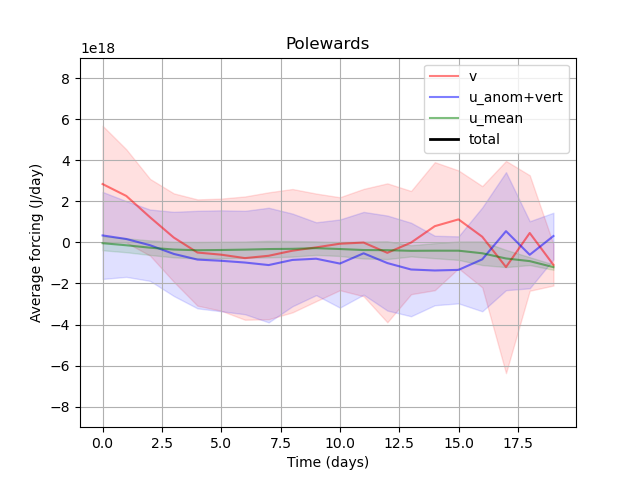

/tmp/ipykernel_2092090/1227410103.py:98: RuntimeWarning: invalid value encountered in true_divide
  std=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
/tmp/ipykernel_2092090/1227410103.py:99: RuntimeWarning: invalid value encountered in true_divide
  plt.fill_between(range(len(heat0)), heat0/c0-std,heat0/c0+std, alpha=0.12,color='red')
/tmp/ipykernel_2092090/1227410103.py:101: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat1/c1, label='u_anom+vert', color='blue', alpha=0.5)
/tmp/ipykernel_2092090/1227410103.py:102: RuntimeWarning: invalid value encountered in true_divide
  std=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
/tmp/ipykernel_2092090/1227410103.py:103: RuntimeWarning: invalid value encountered in true_divide
  plt.fill_between(range(len(heat1)), heat1/c1-std,heat1/c1+std, alpha=0.12,color='blue')
/tmp/ipykernel_2092090/1227410103.py:105: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat2/c2, label='u_mean', color='green', alpha=0.5)
/tm

In [2]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)
    
# with gzip.open('/home/scratch/Abel_data/heat_residuev1', 'rb') as f:
#     res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

heat0=np.zeros(25)
heat1=np.zeros(25)
heat2=np.zeros(25)
res_arr=np.zeros(25)
res_arr2=np.zeros(25)
act=np.zeros(25)
act2=np.zeros(25)

heat20=np.zeros(25)
heat21=np.zeros(25)
heat22=np.zeros(25)

c0=np.zeros(25)
c1=np.zeros(25)
c2=np.zeros(25)
c3=np.zeros(25)
c4=np.zeros(25)

for i in range(len(Rey[0])):
    
#     if (dur_list[i]>=3  and dur_list[i]<=5):
    
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)
        
        for j in range(len(t)):
            heat0[j]+=t[j]
            heat20[j]+=t[j]*t[j]
            c0[j]+=1

        t=Rey[1][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat1[j]+=t[j]
            heat21[j]+=t[j]*t[j]
            c1[j]+=1

        t=Rey[2][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat2[j]+=t[j]
            heat22[j]+=t[j]*t[j]
            c2[j]+=1
            
#         t=res[i]

#         for j in range(len(t)):
#             res_arr[j]+=t[j]
#             res_arr2[j]+=t[j]*t[j]
#             c3[j]+=1
            
#         t=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)+res[i]

#         for j in range(len(t)):
#             act[j]+=t[j]
#             act2[j]+=t[j]*t[j]
#             c4[j]+=1


plt.plot(heat0/c0, label='v', color='red', alpha=0.5)
std=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
plt.fill_between(range(len(heat0)), heat0/c0-std,heat0/c0+std, alpha=0.12,color='red')

plt.plot(heat1/c1, label='u_anom+vert', color='blue', alpha=0.5)
std=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
plt.fill_between(range(len(heat1)), heat1/c1-std,heat1/c1+std, alpha=0.12,color='blue')

plt.plot(heat2/c2, label='u_mean', color='green', alpha=0.5)
std=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
plt.fill_between(range(len(heat2)), heat2/c2-std,heat2/c2+std, alpha=0.12,color='green')

# plt.plot(res_arr/c3, label='res', color='grey', alpha=0.5)
# std=np.sqrt((res_arr2-(res_arr*res_arr)/c3)/(c3-1))
# plt.fill_between(range(len(res_arr)), res_arr/c3-std,res_arr/c3+std, alpha=0.12,color='grey')

plt.plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3, linewidth=2, color='black', label='total')
# plt.plot((act)/c, linewidth=2, color='black', label='total')

# plt.plot(act/c4, label='res', color='grey', alpha=0.5)
# std=np.sqrt((act2-(act*act)/c)/(c-1))
# plt.fill_between(range(len(act)), act/c-std,act/c+std, alpha=0.12,color='grey')

# print(np.mean(heat0), np.mean(heat1), np.mean(heat2))
# th=(heat0+heat1+heat2+res_arr)/c
# print(np.sum(th))

# plt.xlim([-0.1,10])

plt.legend()
plt.ylim(-9e18, 9e18)
plt.title('Polewards')
plt.ylabel('Average forcing (J/day)')
plt.xlabel('Time (days)')
plt.grid()
# plt.savefig('/home/data/lab_abel/Paper1_var1/fig10_dur_poleward2.png', bbox_inches='tight',dpi=300)

In [8]:
print(c2)
x=(heat2/c2)[:-9]
print(x)

[1975. 1975. 1975. 1975. 1595.  982.  611.  367.  210.  132.   93.   59.
   44.   28.   18.   13.    9.    6.    4.    3.    0.    0.    0.    0.
    0.]
[-3.90514979e+16 -1.39703605e+17 -2.57591700e+17 -3.47790486e+17
 -3.81242591e+17 -3.70205027e+17 -3.52409417e+17 -3.24664123e+17
 -3.13611269e+17 -2.79942828e+17 -3.22280638e+17 -3.71867114e+17
 -3.78531625e+17 -4.09886884e+17 -4.03135475e+17 -4.03877424e+17]


/tmp/ipykernel_2092090/1965753869.py:2: RuntimeWarning: invalid value encountered in true_divide
  x=(heat2/c2)[:-9]


<IPython.core.display.Javascript object>


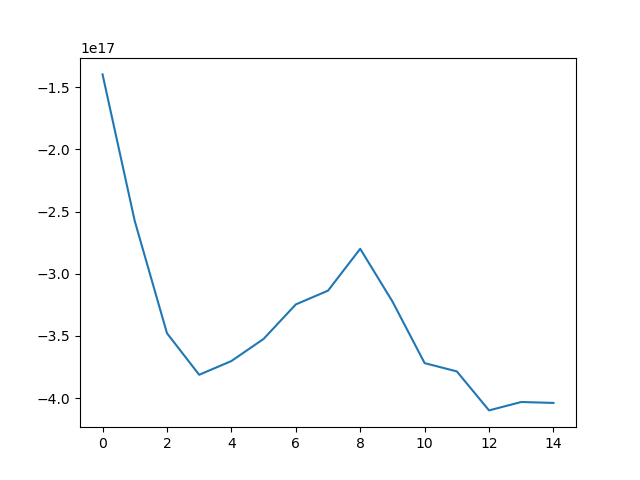

-3.371160137947043e+17


In [11]:
plt.plot(x[1:])
print(np.mean(x[1:]))